***
***
***

# Regression-Based Model

***
***
***

## Introduction
<br>
<b><big>Apprentice Chef, Inc.</big></b><br>
A company that offers a wide selection of daily-prepared gourmet meals delivered directly to your door.<br>
<br>
<b><big>Context</big></b><br>
Apprentice Chef, Inc. is attempting to understand how much revenue to expect from each customer within their first year of orders.<br>
<br>
<b><big>Dataset</big></b><br>
The dataset ("Apprentice_Chef_Dataset.xlsx") in this script contains 29 different features of 1946 existing customers.

***
***
***

## Data Preparation

In [1]:
# Import necessary packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.linear_model
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE


# Set print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
# Load Apprentice_Chef_Data_Dictionary
file1 = "Apprentice_Chef_Data_Dictionary.xlsx"
dictionary = pd.read_excel(file1) 

dictionary

,Column,Data Type,Description
0,REVENUE,float,Total revenue generated over the first year of a customer's journey
1,CROSS_SELL_SUCCESS,integer,"Success of promoting Halfway There (1 = SUCCESS, 0 = FAIL)"
2,NAME,string,Full name of customer (collected upon initial registration)
3,EMAIL,string,Email of customer (collected upon initial registration)
4,FIRST_NAME,string,First name of customer (collected upon initial registration)
5,FAMILY_NAME,string,Last name of customer (collected upon initial registration)
6,TOTAL_MEALS_ORDERED,integer,Total count of meals ordered per customer account
7,UNIQUE_MEALS_PURCH,integer,Count of unique meal sets ordered per customer account
8,CONTACTS_W_CUSTOMER_SERVICE,integer,"Count of times a customer made contact with customer service (phone, chatbot, or email)"
9,PRODUCT_CATEGORIES_VIEWED,integer,Total number of meal categories viewed (online and mobile platforms combined)


In [3]:
# Load Apprentice_Chef_Dataset
file = "Apprentice_Chef_Dataset.xlsx"
data = pd.read_excel(file)

# Check the dataset
data.head(5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [4]:
# Go through basic info about the dataset to capture the big picture
data.info()
data.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


<big>NOTE</big>
- there are 47 missing values in "FAMILY_NAME"

<b> Create a new column called "price_per_meal"</b><br>
Since how much each customer has paid for each meal is unknonwn, I simply divide the total revenue from each customer ("REVENUE") by the total number of meals he/she has ordered ("TOTAL_MEALS_ORDERED") to see how much each meal roughly represents. I named this new feature called "price_per_meal".

In [5]:
# Create a new variable called 'price_per_meal'
PRICE = data['REVENUE'] / data['TOTAL_MEALS_ORDERED']

PRICE = PRICE.round(2)

data['price_per_meal'] = PRICE

<b>Creating a new column called "email_domain"</b><br>
- I will explore if there are any significant factors/ findings between different types of email domails (e.g. gmail, yahoo etc.)
- I will categorize those domains into four groups: professional, personal, junk, and unknown based on the information given from Apprentice Chef
- Then I will convert it into a numerical variable 


In [6]:
#Split personal emails
email_list = []

# looping over each email address
for index, col in data.iterrows():
    
    # splitting email domain at '@'
    split_email = data.loc[index, 'EMAIL'].split(sep = '@')
   
    # appending placeholder_lst with the results
    email_list.append(split_email)
    

# Convert 'email_list' into a DataFrame 
email_df = pd.DataFrame(email_list)


In [7]:
# Changes the name of columns 
email_df.columns = ['name', 'email_domain']

In [8]:
# Concatinates 'email_domain' to our dataframe 'data'
data = pd.concat([data, email_df['email_domain']], axis = 1)

In [9]:
# Email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com',
                              '@caterpillar.com', '@chevron.com', '@cisco.com', '@cocacola.com',
                              '@disney.com', '@dupont.com', '@exxon.com', '@ge.org',
                              '@goldmansacs.com', '@homedepot.com', '@ibm.com', '@intel.com',
                              '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com',
                              '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com',
                              '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']

personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com',
                      '@live.com','@msn.com', '@passport.com']

domain_type_list = []

# loop to group observations by domain type

for domain in data['email_domain']:
        if '@' + domain in professional_email_domains:
            domain_type_list.append('professional')
            
        elif '@' + domain in personal_email_domains:
            domain_type_list.append('personal')
        
        elif '@' + domain in junk_email_domains:
            domain_type_list.append('junk')
            
        else:
            domain_type_list.append('Unknown')

In [10]:
# Concatenate with original DataFrame
data['domain_type'] = pd.Series(domain_type_list)

In [11]:
# Get dummy variables for 'domain_type'
data = pd.get_dummies(data, prefix_sep='__', columns=['domain_type'], drop_first = True)

In [12]:
# Drop 'email_domain' from 'data' because I converted it into dummy variables 
data = data.drop(['email_domain'], axis = 1)

Impute 'NaN' in 'FAMILY_NAME' as 'Unknown'

In [13]:
# Imputed 'Unknown' to 47 NaNs in 'FAMILY_NAME'
data['FAMILY_NAME'] = data['FAMILY_NAME'].fillna('Unknown')

## Feature Engineering 1
Here, I used these following steps to transform the data into features that represent underlying changes in all explanatory variables.<br>
<br>
<b>Step 1.</b> Plotting histograms of the exploratory variables to to see if there are any noticable changing points<br>
<b>Step 2.</b> Set outlier thresholds for those changing points<br>
<b>Step 3.</b> Create new columns of those variables with outlier flags | 1 = outlier  0 = not flagged

### Step 1 : Plot Histogram

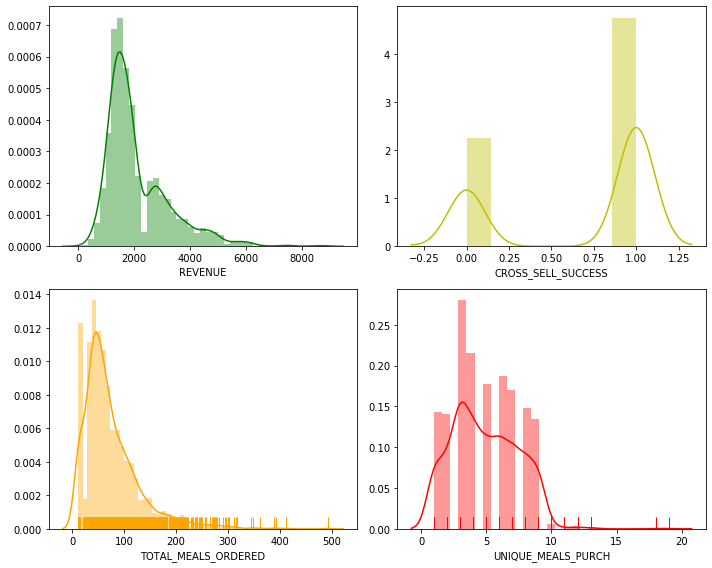

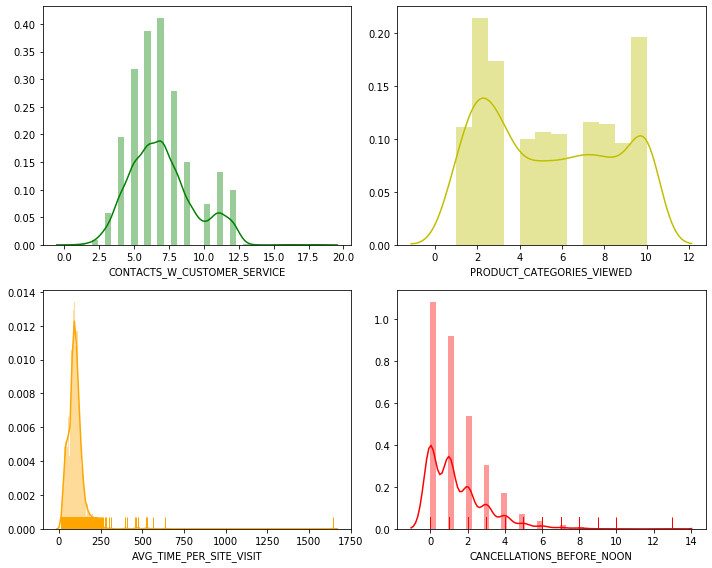

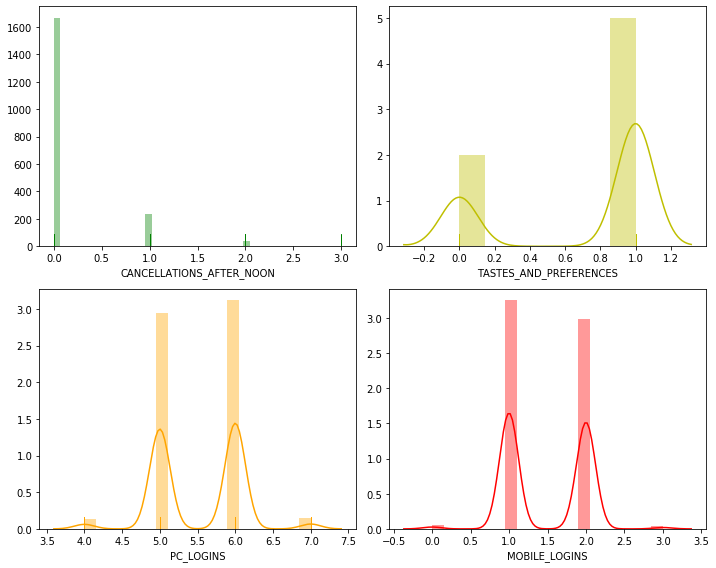

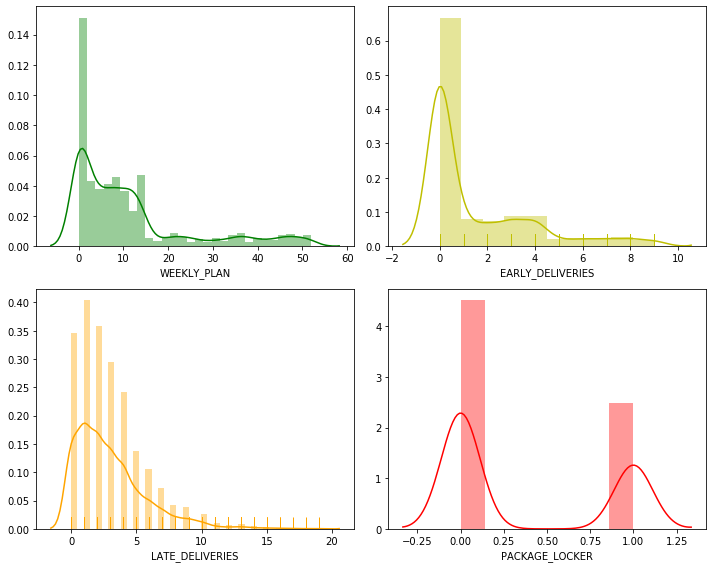

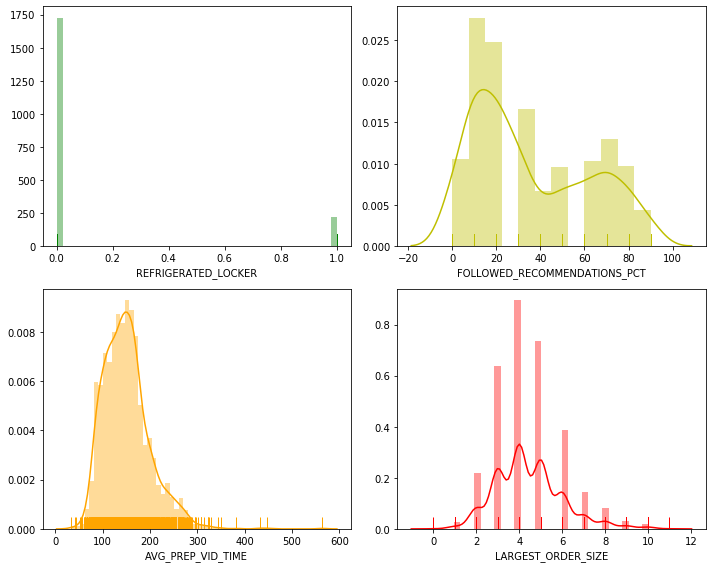

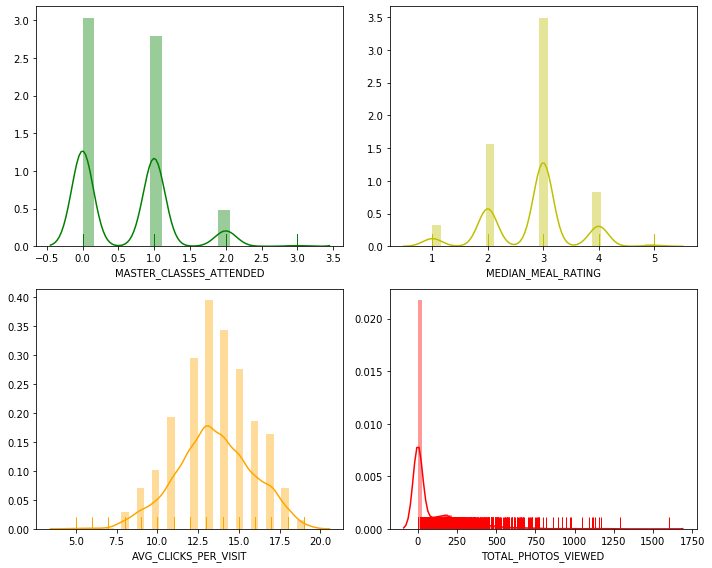

Text(0.5, 0, 'PRICE_PER_MEAL')

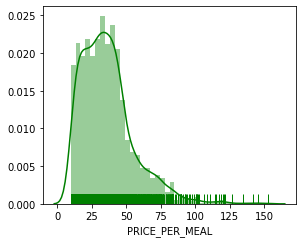

In [14]:
# subplot(2,2,1) means you choose 1 out of 2 * 2

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(data['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')

#####
plt.subplot(2, 2, 2)
sns.distplot(data['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CROSS_SELL_SUCCESS')

#####

plt.subplot(2, 2, 3)
sns.distplot(data['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('TOTAL_MEALS_ORDERED')

#####

plt.subplot(2, 2, 4)
sns.distplot(data['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('UNIQUE_MEALS_PURCH')
plt.tight_layout()
#plt.savefig('Housing Data Histograms 1 of 5.png')
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(data['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

#####
plt.subplot(2, 2, 2)
sns.distplot(data['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

#####

plt.subplot(2, 2, 3)
sns.distplot(data['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

#####

plt.subplot(2, 2, 4)
sns.distplot(data['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
#plt.savefig('Housing Data Histograms 2 of 5.png')
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(data['CANCELLATIONS_AFTER_NOON'],
             #bins  = 'fd',
             kde = False,
             rug = True,
             color = 'g')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

#####

plt.subplot(2, 2, 2)
sns.distplot(data['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

#####

plt.subplot(2, 2, 3)
sns.distplot(data['PC_LOGINS'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('PC_LOGINS')

#####

plt.subplot(2, 2, 4)
sns.distplot(data['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MOBILE_LOGINS')
plt.tight_layout()
#plt.savefig('Housing Data Histograms 3 of 5.png')
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(data['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY_PLAN')

#####

plt.subplot(2, 2, 2)
sns.distplot(data['EARLY_DELIVERIES'],
             bins = 10,
             kde  = True,
             rug  = True,
             color = 'y')
plt.xlabel('EARLY_DELIVERIES')

#####

plt.subplot(2, 2, 3)
sns.distplot(data['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = True,
             rug  = True,
             color = 'orange')
plt.xlabel('LATE_DELIVERIES')

#####

plt.subplot(2, 2, 4)
sns.distplot(data['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
#plt.savefig('Housing Data Histograms 4 of 5.png')
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(data['REFRIGERATED_LOCKER'],
             #bins  = 5,
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('REFRIGERATED_LOCKER')

#####

plt.subplot(2, 2, 2)
sns.distplot(data['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

#####

plt.subplot(2, 2, 3)
sns.distplot(data['AVG_PREP_VID_TIME'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

#####

plt.subplot(2, 2, 4)
sns.distplot(data['LARGEST_ORDER_SIZE'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(data['MASTER_CLASSES_ATTENDED'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')

#####

plt.subplot(2, 2, 2)
sns.distplot(data['MEDIAN_MEAL_RATING'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

#####

plt.subplot(2, 2, 3)
sns.distplot(data['AVG_CLICKS_PER_VISIT'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')


#####

plt.subplot(2, 2, 4)
sns.distplot(data['TOTAL_PHOTOS_VIEWED'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(data['price_per_meal'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'g')
plt.xlabel('PRICE_PER_MEAL')

### Step 2 : Set outlier thresholds using 0.95-quantile for high and 0.05-quantile for low points
NOTE : 0.95-quantile for high and 0.05=quantile for low points mean that I flagged those customers above the rest of 5% (= 0.95-quantile) and those below 5% (= 0.05-quantile) as outliers.

In [15]:
out_REVENUE_hi = 2200
out_TOTAL_MEALS_ORDERED_hi = data['TOTAL_MEALS_ORDERED'].quantile(0.95)
out_UNIQUE_MEALS_PURCH_hi = data['UNIQUE_MEALS_PURCH'].quantile(0.95)
out_CONTACTS_W_CUSTOMER_SERVICE_lo = data['CONTACTS_W_CUSTOMER_SERVICE'].quantile(0.05)
out_CONTACTS_W_CUSTOMER_SERVICE_hi = data['CONTACTS_W_CUSTOMER_SERVICE'].quantile(0.95)
out_AVG_TIME_PER_SITE_VISIT_hi = data['AVG_TIME_PER_SITE_VISIT'].quantile(0.95)
out_CANCELLATIONS_BEFORE_NOON_hi = data['CANCELLATIONS_BEFORE_NOON'].quantile(0.95)
out_CANCELLATIONS_AFTER_NOON_hi = data['CANCELLATIONS_AFTER_NOON'].quantile(0.95)
out_PC_LOGINS_lo = data['PC_LOGINS'].quantile(0.05)
out_PC_LOGINS_hi = data['PC_LOGINS'].quantile(0.95)
out_MOBILE_LOGINS_lo = data['MOBILE_LOGINS'].quantile(0.05)
out_MOBILE_LOGINS_hi = data['MOBILE_LOGINS'].quantile(0.95)
out_WEEKLY_PLAN_hi  = data['WEEKLY_PLAN'].quantile(0.95)
out_EARLY_DELIVERIES_hi = data['EARLY_DELIVERIES'].quantile(0.95)
out_LATE_DELIVERIES_hi = data['LATE_DELIVERIES'].quantile(0.95)
out_FOLLOWED_RECOMMENDATIONS_PCT_lo = data['FOLLOWED_RECOMMENDATIONS_PCT'].quantile(0.05)
out_FOLLOWED_RECOMMENDATIONS_PCT_hi = data['FOLLOWED_RECOMMENDATIONS_PCT'].quantile(0.95)
out_MASTER_CLASSES_ATTENDED_hi = data['MASTER_CLASSES_ATTENDED'].quantile(0.95)
out_MEDIAN_MEAL_RATING_lo = data['MEDIAN_MEAL_RATING'].quantile(0.05)
out_MEDIAN_MEAL_RATING_hi = data['MEDIAN_MEAL_RATING'].quantile(0.95)
out_AVG_PREP_VID_TIME_hi = data['AVG_PREP_VID_TIME'].quantile(0.95)
out_LARGEST_ORDER_SIZE_lo = data['LARGEST_ORDER_SIZE'].quantile(0.05)
out_LARGEST_ORDER_SIZE_hi = data['LARGEST_ORDER_SIZE'].quantile(0.95)
out_AVG_CLICKS_PER_VISIT_lo = data['AVG_CLICKS_PER_VISIT'].quantile(0.05)
out_AVG_CLICKS_PER_VISIT_hi = data['AVG_CLICKS_PER_VISIT'].quantile(0.95)
out_TOTAL_PHOTOS_VIEWED_hi = data['TOTAL_PHOTOS_VIEWED'].quantile(0.95)
out_PRICE_PER_MEAL_hi = data['price_per_meal'].quantile(0.95)
out_REFRIGERATED_LOCKER_hi = data['REFRIGERATED_LOCKER'].quantile(0.95)

### Step 3 : Create new columns of explanaotry variables with outlier flags

In [16]:
# REVENUE
data['out_REVENUE'] = 0
condition_hi = data.loc[0:,'out_REVENUE'][data['REVENUE'] > out_REVENUE_hi]

data['out_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# TOTAL_MEALS_ORDERED
data['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = data.loc[0:,'out_TOTAL_MEALS_ORDERED'][data['TOTAL_MEALS_ORDERED'] > out_TOTAL_MEALS_ORDERED_hi]

data['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
data['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = data.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][data['CONTACTS_W_CUSTOMER_SERVICE'] > out_CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = data.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][data['CONTACTS_W_CUSTOMER_SERVICE'] < out_CONTACTS_W_CUSTOMER_SERVICE_lo]

data['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

data['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
data['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = data.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][data['AVG_TIME_PER_SITE_VISIT'] > out_AVG_TIME_PER_SITE_VISIT_hi]

data['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
data['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = data.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][data['CANCELLATIONS_BEFORE_NOON'] > out_CANCELLATIONS_BEFORE_NOON_hi]

data['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
data['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = data.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][data['CANCELLATIONS_AFTER_NOON'] > out_CANCELLATIONS_AFTER_NOON_hi]

data['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PC_LOGINS
data['out_PC_LOGINS'] = 0
condition_hi = data.loc[0:,'out_PC_LOGINS'][data['PC_LOGINS'] > out_PC_LOGINS_hi]

data['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS 
data['out_MOBILE_LOGINS'] = 0
condition_hi = data.loc[0:,'out_MOBILE_LOGINS'][data['MOBILE_LOGINS'] > out_MOBILE_LOGINS_hi]
condition_lo = data.loc[0:,'out_MOBILE_LOGINS'][data['MOBILE_LOGINS'] < out_MOBILE_LOGINS_lo]

data['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

data['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
data['out_WEEKLY_PLAN'] = 0
condition_hi = data.loc[0:,'out_WEEKLY_PLAN'][data['WEEKLY_PLAN'] > out_WEEKLY_PLAN_hi]

data['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# EARLY_DELIVERIES
data['out_EARLY_DELIVERIES'] = 0
condition_hi = data.loc[0:,'out_EARLY_DELIVERIES'][data['EARLY_DELIVERIES'] > out_EARLY_DELIVERIES_hi]

data['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# LATE_DELIVERIES
data['out_LATE_DELIVERIES'] = 0
condition_hi = data.loc[0:,'out_LATE_DELIVERIES'][data['LATE_DELIVERIES'] > out_LATE_DELIVERIES_hi]

data['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# FOLLOWED_RECOMMENDATIONS_PCT 
data['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = data.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][data['FOLLOWED_RECOMMENDATIONS_PCT'] > out_FOLLOWED_RECOMMENDATIONS_PCT_hi]
condition_lo = data.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][data['FOLLOWED_RECOMMENDATIONS_PCT'] < out_FOLLOWED_RECOMMENDATIONS_PCT_lo]

data['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

data['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# MASTER_CLASSES_ATTENDED 
data['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = data.loc[0:,'out_MASTER_CLASSES_ATTENDED'][data['MASTER_CLASSES_ATTENDED'] > out_MASTER_CLASSES_ATTENDED_hi]

data['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MEDIAN_MEAL_RATING b
data['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = data.loc[0:,'out_MEDIAN_MEAL_RATING'][data['MEDIAN_MEAL_RATING'] > out_MEDIAN_MEAL_RATING_hi]
condition_lo = data.loc[0:,'out_MEDIAN_MEAL_RATING'][data['MEDIAN_MEAL_RATING'] < out_MEDIAN_MEAL_RATING_lo]

data['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

data['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_PREP_VID_TIME
data['out_AVG_PREP_VID_TIME'] = 0
condition_hi = data.loc[0:,'out_AVG_PREP_VID_TIME'][data['AVG_PREP_VID_TIME'] > out_AVG_PREP_VID_TIME_hi]

data['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)




# LARGEST_ORDER_SIZE
data['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = data.loc[0:,'out_LARGEST_ORDER_SIZE'][data['LARGEST_ORDER_SIZE'] > out_LARGEST_ORDER_SIZE_hi]
condition_lo = data.loc[0:,'out_LARGEST_ORDER_SIZE'][data['LARGEST_ORDER_SIZE'] < out_LARGEST_ORDER_SIZE_lo]

data['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

data['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_CLICKS_PER_VISIT
data['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = data.loc[0:,'out_AVG_CLICKS_PER_VISIT'][data['AVG_CLICKS_PER_VISIT'] > out_AVG_CLICKS_PER_VISIT_hi]
condition_lo = data.loc[0:,'out_AVG_CLICKS_PER_VISIT'][data['AVG_CLICKS_PER_VISIT'] < out_AVG_CLICKS_PER_VISIT_lo]

data['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

data['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_PHOTOS_VIEWED
data['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = data.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][data['TOTAL_PHOTOS_VIEWED'] > out_TOTAL_PHOTOS_VIEWED_hi]

data['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PRICE_PER_MEAL
data['out_PRICE_PER_MEAL'] = 0
condition_hi = data.loc[0:,'out_PRICE_PER_MEAL'][data['price_per_meal'] > out_PRICE_PER_MEAL_hi]

data['out_PRICE_PER_MEAL'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# REFRIGERATE_LOCKER
data['out_REFRIGERATED_LOCKER'] = 0
condition_hi = data.loc[0:,'out_REFRIGERATED_LOCKER'][data['REFRIGERATED_LOCKER'] >= out_REFRIGERATED_LOCKER_hi]

data['out_REFRIGERATED_LOCKER'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


## Feature Engineering 2
Here, I used the following steps to identify where a variable's trend changes in terms of its relationship with what to predict (in this case, REVENUE).<br>
<br>
<b>Step 1.</b> Use scatter plot to see any trend changes<br>
<b>Step 2.</b> Set trend-based thresholds to flag the changes<br>
<b>Step 3.</b> Create new columns with trend flag

### Step 1 : Use Scatter Plot in the Relationship between Each Variable and Revenue

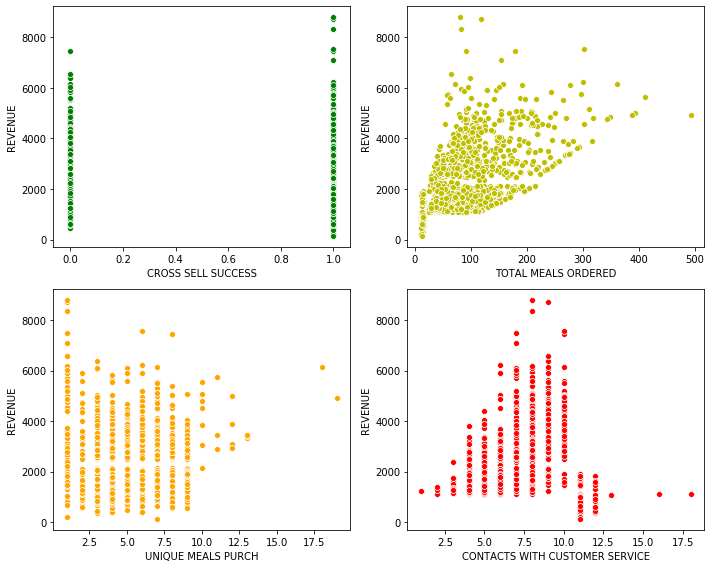

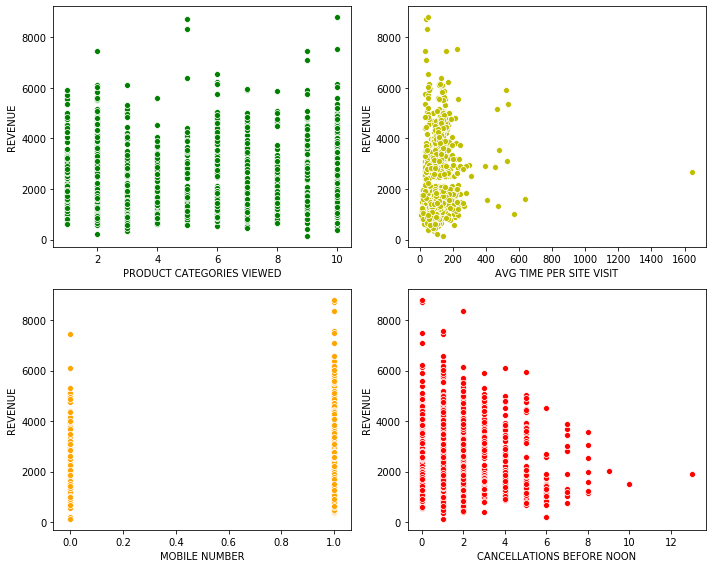

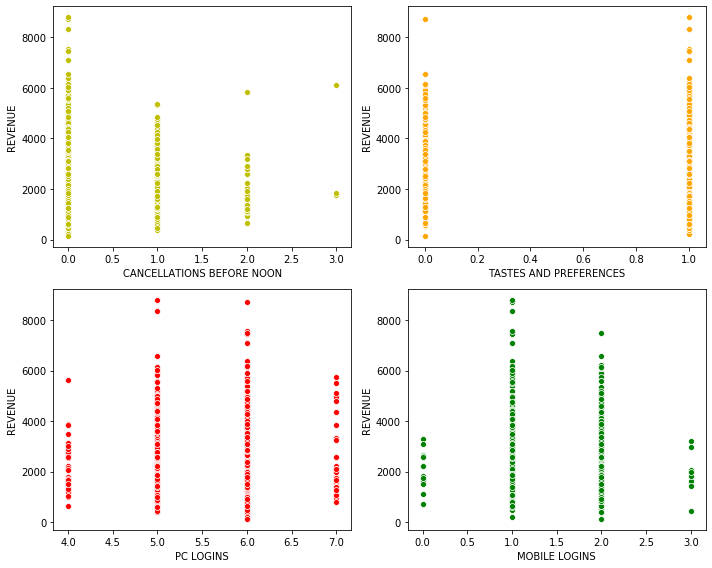

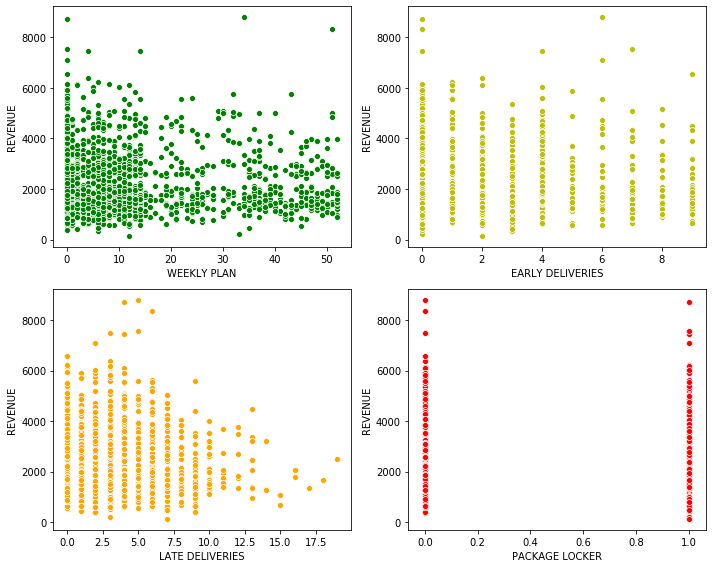

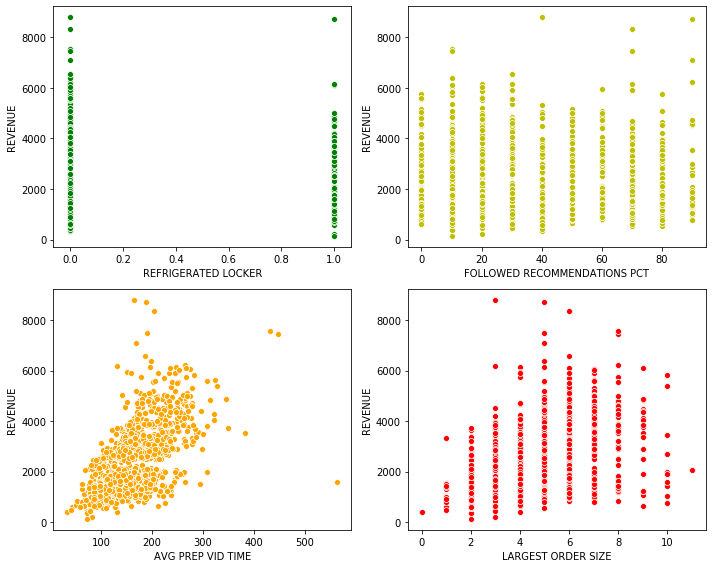

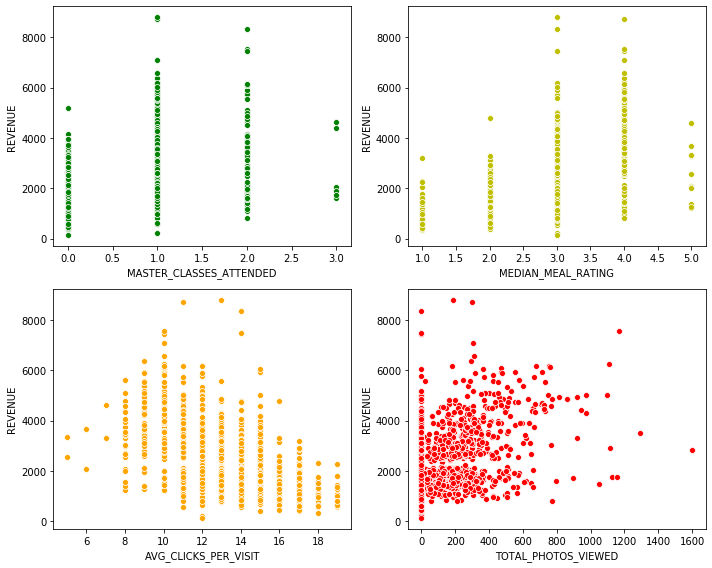

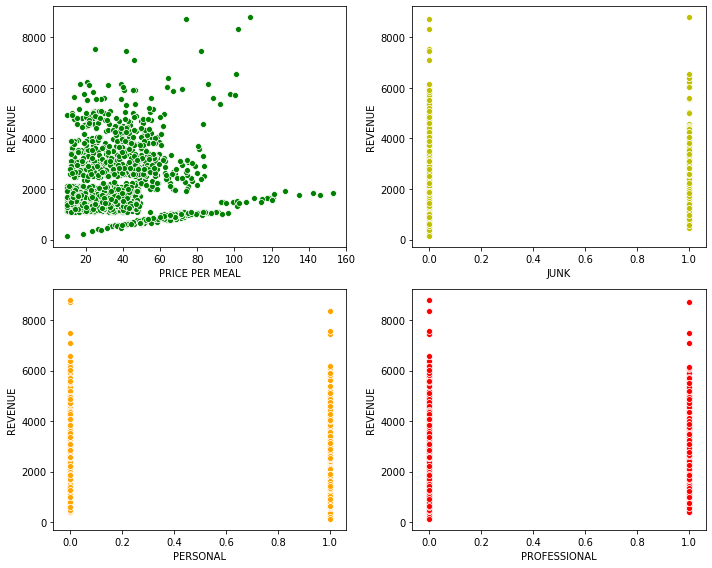

In [17]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = data['CROSS_SELL_SUCCESS'],
                y = data['REVENUE'],
                color = 'g')
plt.xlabel('CROSS SELL SUCCESS')

#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = data['TOTAL_MEALS_ORDERED'],
                y = data['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL MEALS ORDERED')

#####

plt.subplot(2, 2, 3)
sns.scatterplot(x = data['UNIQUE_MEALS_PURCH'],
                y = data['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE MEALS PURCH')

#####
plt.subplot(2, 2, 4)
sns.scatterplot(x = data['CONTACTS_W_CUSTOMER_SERVICE'],
                y = data['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS WITH CUSTOMER SERVICE')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = data['PRODUCT_CATEGORIES_VIEWED'],
                y = data['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = data['AVG_TIME_PER_SITE_VISIT'],
                y = data['REVENUE'],
                color = 'y')
plt.xlabel('AVG TIME PER SITE VISIT')

#####

plt.subplot(2, 2, 3)
sns.scatterplot(x = data['MOBILE_NUMBER'],
                y = data['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE NUMBER')

#####

plt.subplot(2, 2, 4)
sns.scatterplot(x = data['CANCELLATIONS_BEFORE_NOON'],
                y = data['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS BEFORE NOON')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = data['CANCELLATIONS_AFTER_NOON'],
                y = data['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS BEFORE NOON')

#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = data['TASTES_AND_PREFERENCES'],
                y = data['REVENUE'],
                color = 'orange')
plt.xlabel('TASTES AND PREFERENCES')

#####

plt.subplot(2, 2, 3)
sns.scatterplot(x = data['PC_LOGINS'],
                y = data['REVENUE'],
                color = 'r')
plt.xlabel('PC LOGINS')

#####

plt.subplot(2, 2, 4)
sns.scatterplot(x = data['MOBILE_LOGINS'],
                y = data['REVENUE'],
                color = 'g')
plt.xlabel('MOBILE LOGINS')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = data['WEEKLY_PLAN'],
                y = data['REVENUE'],
                color = 'g')
plt.xlabel('WEEKLY PLAN')
           
#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = data['EARLY_DELIVERIES'],
                y = data['REVENUE'],
                color = 'y')
plt.xlabel('EARLY DELIVERIES')

#####           
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = data['LATE_DELIVERIES'],
                y = data['REVENUE'],
                color = 'orange')
plt.xlabel('LATE DELIVERIES')

#####           
           
plt.subplot(2, 2, 4)
sns.scatterplot(x = data['PACKAGE_LOCKER'],
                y = data['REVENUE'],
                color = 'r')
plt.xlabel('PACKAGE LOCKER')

plt.tight_layout()
plt.show()

#####
#####
           
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = data['REFRIGERATED_LOCKER'],
                y = data['REVENUE'],
                color = 'g')
plt.xlabel('REFRIGERATED LOCKER')
           
#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = data['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = data['REVENUE'],
                color = 'y')
plt.xlabel('FOLLOWED RECOMMENDATIONS PCT')

#####           
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = data['AVG_PREP_VID_TIME'],
                y = data['REVENUE'],
                color = 'orange')
plt.xlabel('AVG PREP VID TIME')

#####           
           
plt.subplot(2, 2, 4)
sns.scatterplot(x = data['LARGEST_ORDER_SIZE'],
                y = data['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST ORDER SIZE')

plt.tight_layout()
plt.show()

#####
#####
           
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = data['MASTER_CLASSES_ATTENDED'],
                y = data['REVENUE'],
                color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')
           
#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = data['MEDIAN_MEAL_RATING'],
                y = data['REVENUE'],
                color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

#####           
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = data['AVG_CLICKS_PER_VISIT'],
                y = data['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

#####           
           
plt.subplot(2, 2, 4)
sns.scatterplot(x = data['TOTAL_PHOTOS_VIEWED'],
                y = data['REVENUE'],
                color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.savefig('REVENUE__PER_MEAL.png')

plt.tight_layout()
plt.show()

#####
#####
           
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = data['price_per_meal'],
                y = data['REVENUE'],
                color = 'g')
plt.xlabel('PRICE PER MEAL')
plt.savefig('Housing Data Scatterplots 4 of 5.png')
           
#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = data['domain_type__junk'],
                y = data['REVENUE'],
                color = 'y')
plt.xlabel('JUNK')

#####           
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = data['domain_type__personal'],
                y = data['REVENUE'],
                color = 'orange')
plt.xlabel('PERSONAL')

#####           
           
plt.subplot(2, 2, 4)
sns.scatterplot(x = data['domain_type__professional'],
                y = data['REVENUE'],
                color = 'r')
plt.xlabel('PROFESSIONAL')

plt.tight_layout()
plt.show()

### Step 2 : Set Trend-Based Thresholds 

In [18]:
## Trend changes *below/above* these points 
TOTAL_MEALS_ORDERED_hi = 150 
UNIQUE_MEALS_PURCH_hi = 9 
CONTACTS_W_CUSTOMER_SERVICE_hi = 10 
AVG_TIME_PER_SITE_VISIT_hi = 300 
CANCELLATIONS_BEFORE_NOON_hi = 6 
CANCELLATIONS_AFTER_NOON_hi = 2 
PC_LOGINS_lo = 5  
PC_LOGINS_hi = 6 
MOBILE_LOGINS_lo = 1
MOBILE_LOGINS_hi = 2
WEEKLY_PLAN_hi = 15 
EARLY_DELIVERIES_hi = 5 
LATE_DELIVERIES_hi = 10 
FOLLOWED_RECOMMENDATIONS_PCT_hi = 80 
AVG_PREP_VID_TIME_hi = 280 
LARGEST_ORDER_SIZE_hi = 8 
MASTER_CLASSES_ATTENDED_hi = 2 
MEDIAN_MEAL_RATING_hi = 3 
AVG_CLICKS_PER_VISIT_hi = 10
TOTAL_PHOTOS_VIEWED_hi = 400
PRICE_PER_MEAL_hi = 50

## Trend changes *at* these points 
UNIQUE_MEALS_PURCH_at = 1 
PRODUCT_CATEGORIES_VIEWED_at= 5
MOBILE_NUMBER_at = 1 
WEEKLY_PLAN_at = 0
TOTAL_PHOTOS_VIEWED_at = 0


### Step 3 : Create new columns with trend-based thresholds 

In [19]:
# TOTAL_MEALS_ORDERED
data['trend_TOTAL_MEALS_ORDERED'] = 0
condition_hi = data.loc[0:,'trend_TOTAL_MEALS_ORDERED'][data['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

data['trend_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# UNIQUE_MEALS_PURCH
data['trend_UNIQUE_MEALS_PURCH'] = 0
condition_hi = data.loc[0:,'trend_UNIQUE_MEALS_PURCH'][data['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

data['trend_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
data['trend_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = data.loc[0:,'trend_CONTACTS_W_CUSTOMER_SERVICE'][data['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

data['trend_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
data['trend_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = data.loc[0:,'trend_AVG_TIME_PER_SITE_VISIT'][data['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

data['trend_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
data['trend_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = data.loc[0:,'trend_CANCELLATIONS_BEFORE_NOON'][data['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

data['trend_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
data['trend_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = data.loc[0:,'trend_CANCELLATIONS_AFTER_NOON'][data['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

data['trend_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PC_LOGINS
data['trend_PC_LOGINS'] = 0
condition_hi = data.loc[0:,'trend_PC_LOGINS'][data['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo = data.loc[0:,'trend_PC_LOGINS'][data['PC_LOGINS'] < PC_LOGINS_lo]

data['trend_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

data['trend_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS
data['trend_MOBILE_LOGINS'] = 0
condition_hi = data.loc[0:,'trend_MOBILE_LOGINS'][data['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo = data.loc[0:,'trend_MOBILE_LOGINS'][data['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

data['trend_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

data['trend_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# WEEKLY_PLAN
data['trend_WEEKLY_PLAN'] = 0
condition_hi = data.loc[0:,'trend_WEEKLY_PLAN'][data['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

data['trend_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# EARLY_DELIVERIES
data['trend_EARLY_DELIVERIES'] = 0
condition_hi = data.loc[0:,'trend_EARLY_DELIVERIES'][data['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

data['trend_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# LATE_DELIVERIES
data['trend_LATE_DELIVERIES'] = 0
condition_hi = data.loc[0:,'trend_LATE_DELIVERIES'][data['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

data['trend_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# FOLLOWED_RECOMMENDATIONS_PCT
data['trend_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = data.loc[0:,'trend_FOLLOWED_RECOMMENDATIONS_PCT'][data['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_hi]

data['trend_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_PREP_VID_TIME
data['trend_AVG_PREP_VID_TIME'] = 0
condition_hi = data.loc[0:,'trend_AVG_PREP_VID_TIME'][data['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

data['trend_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# LARGEST_ORDER_SIZE
data['trend_LARGEST_ORDER_SIZE'] = 0
condition_hi = data.loc[0:,'trend_LARGEST_ORDER_SIZE'][data['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

data['trend_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# MASTER_CLASSES_ATTENDED
data['trend_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = data.loc[0:,'trend_MASTER_CLASSES_ATTENDED'][data['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

data['trend_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MEDIAN_MEAL_RATING
data['trend_MEDIAN_MEAL_RATING'] = 0
condition_hi = data.loc[0:,'trend_MEDIAN_MEAL_RATING'][data['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

data['trend_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG_CLICKS_PER_VISIT
data['trend_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = data.loc[0:,'trend_AVG_CLICKS_PER_VISIT'][data['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]

data['trend_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# TOTAL_PHOTOS_VIEWED
data['trend_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = data.loc[0:,'trend_TOTAL_PHOTOS_VIEWED'][data['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

data['trend_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PRICE_PER_MEAL
data['trend_PRICE_PER_MEAL'] = 0
condition_hi = data.loc[0:,'trend_PRICE_PER_MEAL'][data['price_per_meal'] > PRICE_PER_MEAL_hi]

data['trend_PRICE_PER_MEAL'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)




# UNIQUE_MEALS_PURCH
data['trend_UNIQUE_MEALS_PURCH_at'] = 0
condition = data.loc[0:,'trend_UNIQUE_MEALS_PURCH_at'][data['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURCH_at]

data['trend_UNIQUE_MEALS_PURCH_at'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# PRODUCT_CATEGORIES_VIEWED
data['trend_PRODUCT_CATEGORIES_VIEWED_at'] = 0
condition = data.loc[0:,'trend_PRODUCT_CATEGORIES_VIEWED_at'][data['PRODUCT_CATEGORIES_VIEWED'] == PRODUCT_CATEGORIES_VIEWED_at]

data['trend_PRODUCT_CATEGORIES_VIEWED_at'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_NUMBER
data['trend_MOBILE_NUMBER_at'] = 0
condition = data.loc[0:,'trend_MOBILE_NUMBER_at'][data['MOBILE_NUMBER'] == MOBILE_NUMBER_at]

data['trend_MOBILE_NUMBER_at'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
data['trend_WEEKLY_PLAN_at'] = 0
condition = data.loc[0:,'trend_WEEKLY_PLAN_at'][data['WEEKLY_PLAN'] == WEEKLY_PLAN_at]

data['trend_WEEKLY_PLAN_at'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_PHOTOS_VIEWED
data['trend_TOTAL_PHOTOS_VIEWED_at'] = 0
condition = data.loc[0:,'trend_TOTAL_PHOTOS_VIEWED_at'][data['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_at]

data['trend_TOTAL_PHOTOS_VIEWED_at'].replace(to_replace = condition,
                                    value      = 1,
                                    inplace    = True)


## Statistical Analysis 
<b> Explore correlations between all explanatory variables vs. REVENUE </b>

In [20]:
# Create a (Pearson) correlation matrix
data_correlation= data.corr().round(2)


# Print orrelations with 'REVENUE'
print(data_correlation.loc['REVENUE'].sort_values(ascending = False).head(20))


print(
"""

Findings
- AVG_PREP_VID_TIME, MEDIAN_MEAL_RATING, TOTAL_MEALS_ORDERED,trend_MEDIAN_MEAL_RATING 
  have relatively high positive correlations (>50) with REVENUE

""")

REVENUE                        1.00
out_REVENUE                    0.82
AVG_PREP_VID_TIME              0.64
MEDIAN_MEAL_RATING             0.61
TOTAL_MEALS_ORDERED            0.60
trend_MEDIAN_MEAL_RATING       0.59
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
trend_TOTAL_MEALS_ORDERED      0.43
out_AVG_PREP_VID_TIME          0.41
out_TOTAL_MEALS_ORDERED        0.38
trend_TOTAL_PHOTOS_VIEWED      0.35
out_TOTAL_PHOTOS_VIEWED        0.31
trend_UNIQUE_MEALS_PURCH_at    0.21
trend_AVG_PREP_VID_TIME        0.20
trend_UNIQUE_MEALS_PURCH       0.17
out_LARGEST_ORDER_SIZE         0.16
out_AVG_CLICKS_PER_VISIT       0.14
AVG_TIME_PER_SITE_VISIT        0.14
Name: REVENUE, dtype: float64


Findings
- AVG_PREP_VID_TIME, MEDIAN_MEAL_RATING, TOTAL_MEALS_ORDERED,trend_MEDIAN_MEAL_RATING 
  have relatively high positive correlations (>50) with REVENUE




<b>Use OLS Regression Results to determine if there are any statistically valuable outputs (like p-value)</b>

In [21]:
# Make a copy of 'data' so that it won't change the original data 
data_exp = data.copy()

In [22]:
# dropping REVENUE, NAME, EMAIL, FIRST_NAME, FAMILY_NAME, out_REVENUE from the explanatory variable set
data_exp = data_exp.drop(['REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME','out_REVENUE'], axis=1)


# formatting each explanatory variable for statsmodels
for val in data_exp:
    print(f"data['{val}'] +")

data['CROSS_SELL_SUCCESS'] +
data['TOTAL_MEALS_ORDERED'] +
data['UNIQUE_MEALS_PURCH'] +
data['CONTACTS_W_CUSTOMER_SERVICE'] +
data['PRODUCT_CATEGORIES_VIEWED'] +
data['AVG_TIME_PER_SITE_VISIT'] +
data['MOBILE_NUMBER'] +
data['CANCELLATIONS_BEFORE_NOON'] +
data['CANCELLATIONS_AFTER_NOON'] +
data['TASTES_AND_PREFERENCES'] +
data['PC_LOGINS'] +
data['MOBILE_LOGINS'] +
data['WEEKLY_PLAN'] +
data['EARLY_DELIVERIES'] +
data['LATE_DELIVERIES'] +
data['PACKAGE_LOCKER'] +
data['REFRIGERATED_LOCKER'] +
data['FOLLOWED_RECOMMENDATIONS_PCT'] +
data['AVG_PREP_VID_TIME'] +
data['LARGEST_ORDER_SIZE'] +
data['MASTER_CLASSES_ATTENDED'] +
data['MEDIAN_MEAL_RATING'] +
data['AVG_CLICKS_PER_VISIT'] +
data['TOTAL_PHOTOS_VIEWED'] +
data['price_per_meal'] +
data['domain_type__junk'] +
data['domain_type__personal'] +
data['domain_type__professional'] +
data['out_TOTAL_MEALS_ORDERED'] +
data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
data['out_AVG_TIME_PER_SITE_VISIT'] +
data['out_CANCELLATIONS_BEFORE_NOON'] +
data['o

In [23]:
# Create OLS models

lm_full = smf.ols(formula = """ data['REVENUE'] ~
data['CROSS_SELL_SUCCESS'] +
data['TOTAL_MEALS_ORDERED'] +
data['UNIQUE_MEALS_PURCH'] +
data['CONTACTS_W_CUSTOMER_SERVICE'] +
data['PRODUCT_CATEGORIES_VIEWED'] +
data['AVG_TIME_PER_SITE_VISIT'] +
data['MOBILE_NUMBER'] +
data['CANCELLATIONS_BEFORE_NOON'] +
data['CANCELLATIONS_AFTER_NOON'] +
data['TASTES_AND_PREFERENCES'] +
data['PC_LOGINS'] +
data['MOBILE_LOGINS'] +
data['WEEKLY_PLAN'] +
data['EARLY_DELIVERIES'] +
data['LATE_DELIVERIES'] +
data['PACKAGE_LOCKER'] +
data['REFRIGERATED_LOCKER'] +
data['FOLLOWED_RECOMMENDATIONS_PCT'] +
data['AVG_PREP_VID_TIME'] +
data['LARGEST_ORDER_SIZE'] +
data['MASTER_CLASSES_ATTENDED'] +
data['MEDIAN_MEAL_RATING'] +
data['AVG_CLICKS_PER_VISIT'] +
data['TOTAL_PHOTOS_VIEWED'] +
data['price_per_meal'] +
data['domain_type__junk'] +
data['domain_type__personal'] +
data['domain_type__professional'] +
data['out_TOTAL_MEALS_ORDERED'] +
data['out_CONTACTS_W_CUSTOMER_SERVICE'] +
data['out_AVG_TIME_PER_SITE_VISIT'] +
data['out_CANCELLATIONS_BEFORE_NOON'] +
data['out_CANCELLATIONS_AFTER_NOON'] +
data['out_PC_LOGINS'] +
data['out_MOBILE_LOGINS'] +
data['out_WEEKLY_PLAN'] +
data['out_EARLY_DELIVERIES'] +
data['out_LATE_DELIVERIES'] +
data['out_FOLLOWED_RECOMMENDATIONS_PCT'] +
data['out_MASTER_CLASSES_ATTENDED'] +
data['out_MEDIAN_MEAL_RATING'] +
data['out_AVG_PREP_VID_TIME'] +
data['out_LARGEST_ORDER_SIZE'] +
data['out_AVG_CLICKS_PER_VISIT'] +
data['out_TOTAL_PHOTOS_VIEWED'] +
data['out_PRICE_PER_MEAL'] +
data['out_REFRIGERATED_LOCKER'] +
data['trend_TOTAL_MEALS_ORDERED'] +
data['trend_UNIQUE_MEALS_PURCH'] +
data['trend_CONTACTS_W_CUSTOMER_SERVICE'] +
data['trend_AVG_TIME_PER_SITE_VISIT'] +
data['trend_CANCELLATIONS_BEFORE_NOON'] +
data['trend_CANCELLATIONS_AFTER_NOON'] +
data['trend_PC_LOGINS'] +
data['trend_MOBILE_LOGINS'] +
data['trend_WEEKLY_PLAN'] +
data['trend_EARLY_DELIVERIES'] +
data['trend_LATE_DELIVERIES'] +
data['trend_FOLLOWED_RECOMMENDATIONS_PCT'] +
data['trend_AVG_PREP_VID_TIME'] +
data['trend_LARGEST_ORDER_SIZE'] +
data['trend_MASTER_CLASSES_ATTENDED'] +
data['trend_MEDIAN_MEAL_RATING'] +
data['trend_AVG_CLICKS_PER_VISIT'] +
data['trend_TOTAL_PHOTOS_VIEWED'] +
data['trend_PRICE_PER_MEAL'] +
data['trend_UNIQUE_MEALS_PURCH_at'] +
data['trend_PRODUCT_CATEGORIES_VIEWED_at'] +
data['trend_MOBILE_NUMBER_at'] +
data['trend_WEEKLY_PLAN_at'] +
data['trend_TOTAL_PHOTOS_VIEWED_at']""", data = data_exp)

results = lm_full.fit()


# printing the results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        data['REVENUE']   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     166.2
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:06:14   Log-Likelihood:                -14585.
No. Observations:                1946   AIC:                         2.930e+04
Df Residuals:                    1879   BIC:                         2.968e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                  -1654.6031    266.177     -6.216      0.000   -2176.638   -1132.569
data['CROSS_SELL_SUCCESS']                   -47.6256     26.283     -1.812      0.070     -99.172       3.921
data['TOTAL_MEALS_ORDERED']                   14.9613      0.525     28.521      0.000      13.932      15.990
data['UNIQUE_MEALS_PURCH']                    -1.9153      4.922     -0.389      0.697     -11.568       7.738
data['CONTACTS_W_CUSTOMER_SERVICE']           73.2920      7.641      9.592      0.000      58.306      88.278
data['PRODUCT_CATEGORIES_VIEWED']              2.7831      3.393      0.820      0.412      -3.871       9.437
data['AVG_TIME_PER_SITE_VISIT']                0.3945      0.264      1.495      0.135      -0.123       0.912
data['MOBILE_NUMBER']                          6.1174     15.709      0.389      0.697     -24.691      36.926
data['CANCELLATIONS_BEFORE_NOON']             -3.4707      8.802     -0.394      0.693     -20.733      13.791
data['CANCELLATIONS_AFTER_NOON']              13.7929     31.351      0.440      0.660     -47.694      75.280
data['TASTES_AND_PREFERENCES']                -7.3062     22.727     -0.321      0.748     -51.878      37.266
data['PC_LOGINS']                            -14.4624     20.969     -0.690      0.490     -55.588      26.663
data['MOBILE_LOGINS']                          3.5196     19.465      0.181      0.857     -34.655      41.694
data['WEEKLY_PLAN']                            1.2293      2.240      0.549      0.583      -3.163       5.622
data['EARLY_DELIVERIES']                       5.1099      7.149      0.715      0.475      -8.910      19.130
data['LATE_DELIVERIES']                        9.2536      4.961      1.865      0.062      -0.476      18.983
data['PACKAGE_LOCKER']                        28.6398     24.383      1.175      0.240     -19.180      76.459
data['REFRIGERATED_LOCKER']                   -9.1553     18.388     -0.498      0.619     -45.218      26.907
data['FOLLOWED_RECOMMENDATIONS_PCT']           0.8179      0.468      1.747      0.081      -0.100       1.736
data['AVG_PREP_VID_TIME']                      4.8826      0.493      9.899      0.000       3.915       5.850
data['LARGEST_ORDER_SIZE']                   -64.6882     12.416     -5.210      0.000     -89.038     -40.338
data['MASTER_CLASSES_ATTENDED']              120.8711     19.117      6.323      0.000      83.379     158.363
data['MEDIAN_MEAL_RATING']                    57.2510     30.616      1.870      0.062      -2.794     117.296
data['AVG_CLICKS_PER_VISIT']                  -5.6917      9.049     -0.629      0.529     -23.439      12.056
data['TOTAL_PHOTOS_VIEWED']                    0.4341      0.142      3.052      0.002

## Building Models
<br>
I tried multiple models to determine the best model that generates the highest R-squared.

- Linear Regression 
- Ridge Regression 
- Lasso Regression
- K-Nearest Neighbors Regression
- Linear Regression with standardized data 
- Ridge Regression with standardized data  
- Lasso Regression with standardized data 
- K-Nearest Neighbors Regression with standardized data 
- Gradient Boosting Regressor 


### Prepare training and testing datasets 
I dropped "REVENUE" and all columns whose data type was object to prepare explanatory variable data because it cannot contain targeting column or non-numeric data.

In [24]:
# Prepare explanatory variable data
data_exp = data.drop(['REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'out_REVENUE'], axis=1)

# preparing response variable data
data_target = data.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            data_exp, # this is explanatory variable data
            data_target, # this is response variable data
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 71)
(1459,)
(487, 71)
(487,)


### Linear Regression

- Training Score : 0.857
- Testing Score : 0.837

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Fit to the training data
lr_fit = lr.fit(X_train, y_train)


# Predict on new data
lr_pred = lr_fit.predict(X_test)


# Score the results
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:',  lr.score(X_test, y_test).round(3))


Training Score: 0.857
Testing Score: 0.837


### Ridge Regression

- Training Score : 0.857
- Testing Score : 0.837

I got exactly the same results as linear regression model

In [26]:
import sklearn.linear_model
ridge_model = sklearn.linear_model.Ridge()

# Fit the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# Predict on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(3))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(3))


Training Score: 0.857
Testing Score: 0.837


### Lasso Regression 

- Training Score : 0.855
- Testing Score : 0.838

Slightly worse score on training sets, but a little better on testing sets

In [27]:
# Lasso Regression - shrinks coefficients down to zero 

lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(3))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(3))


Training Score: 0.855
Testing Score: 0.838


### K-Nearest Neighbors Regressor with optimal number of neighbors 8

- Training Score: 0.7333
- Testing Score: 0.6438

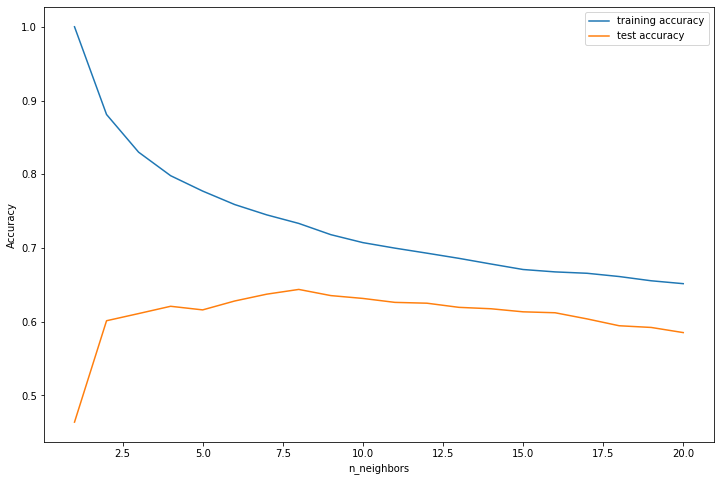

The optimal number of neighbors is 8


In [28]:
training_accuracy = []
test_accuracy = []


# Build a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# Plot the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# Finds the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [29]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(3))
print('Testing Score:',  knn_opt.score(X_test, y_test).round(3))

Training Score: 0.733
Testing Score: 0.644


### Standardize the data

In [30]:
# Instantiate a StandardScaler()
scaler = StandardScaler()


# Fit the scaler with data_exp
scaler.fit(data_exp)


# Transform our data after fit
X_scaled = scaler.transform(data_exp)


# Convert scaled data into a DataFrame
X_scaled_data = pd.DataFrame(X_scaled)



### Linear Regression with Standardized data

- Training Score : 0.857
- Testing Score : 0.837

It does not make any difference.

In [31]:
# Prepare training and testing sets with standardized data

X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_data, # this is explanatory variable data
            data_target, # this is response variable data
            test_size = 0.25,
            random_state = 222) 

In [32]:
lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

lr_pred = lr_fit.predict(X_test)


# Score the results
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:',  lr.score(X_test, y_test).round(3))


Training Score: 0.857
Testing Score: 0.837


### Ridge Regression with standardized data

- Training Score : 0.857
- Testing Score : 0.837

No difference

In [33]:
ridge_model = sklearn.linear_model.Ridge()

# Fit the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# Predict on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(3))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(3))


Training Score: 0.857
Testing Score: 0.837


### Lasso Regression with standardized data

- Training : 0.856
- Testing : 0.837

Slightly worse than the model with original data

In [34]:
# Lasso Regression - shrinks coefficients down to zero 

lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(3))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(3))

Training Score: 0.856
Testing Score: 0.837


### KNeighborsRegressor with optimal number of neighbors 8

- Training Score: 0.688
- Testing Score: 0.57

In [35]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 8


In [36]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand.fit(X_train, y_train)



# PREDITCING on new data
knn_stand_pred = knn_stand.predict(X_test)



# SCORING the results
print('Training Score:', knn_stand.score(X_train, y_train).round(3))
print('Testing Score:',  knn_stand.score(X_test, y_test).round(3))


Training Score: 0.688
Testing Score: 0.57


### Gradient Boosting Regressor

- Training Score: 1.0
- Testing Score: 0.974

Best accuracy among all the models I have tried so far.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
            data_exp, # this is explanatory variable data
            data_target, # this is response variable data
            test_size = 0.25,
            random_state = 222)


gbr = GradientBoostingRegressor(n_estimators = 1000,min_samples_split = 3,max_depth = 3, random_state = 222)

# Fit the training data

gbr.fit(X_train,y_train)

# Predict on new data
y_pred = gbr.predict(X_test)

print('GradientBoost Model Training Score:', gbr.score(X_train, y_train).round(3))
print('GradientBoost Model Testing Score:',  gbr.score(X_test, y_test).round(3))

GradientBoost Model Training Score: 1.0
GradientBoost Model Testing Score: 0.974


RMSE (Root Mean Square Error) score with the gradient boosting regressor : 188.82

This is less than 10% of the mean of REVENUE = the model is good enough

NOTE:
- RMSE can be interpreted as the standard deviation of the unexplained variance
- Lower values of RMSE indicate better fit


In [38]:
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test ** (1/2)

# Print RMSE
print(mse_test)
print(rmse_test)

35651.78972388321
188.81681525723076
